In [2]:
import h5py
import numpy as np
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from astropy.cosmology import z_at_value
from matplotlib import gridspec
from astropy.io import fits
from astropy.table import Table
import astropy.units as u

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d
from glob import glob
import seaborn as sea
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
snapf = np.arange(116,85,-1)
snaplist = []

for s in snapf:
    if s <100:
        snaplist.append('0{}'.format(s))

    else:
        snaplist.append('{}'.format(s))

In [4]:
zr = [1.657839, 1.616292, 1.575603, 1.535745, 1.496693, 1.458422, 1.420909, 1.384130, 1.348063, 1.312687, 1.277981, 
1.243926, 1.210501, 1.177688, 1.145470, 1.113828, 1.082747, 1.052208, 1.022198, 0.992700, 0.963699, 0.935181, 
0.907132, 0.879540, 0.852389, 0.825669, 0.799366, 0.773469, 0.747965, 0.722845, 0.698096]

rshift = np.array(zr[::-1])

In [5]:
def x_params(init_num):

    progen = init_num
    lmass = np.zeros(len(snaplist))
    sfr= np.zeros(len(snaplist))
    r50= np.zeros(len(snaplist))
    r20= np.zeros(len(snaplist))
    r80= np.zeros(len(snaplist))


    for i in range(len(snaplist)):
        f = h5py.File('/Volumes/Vince_CLEAR/Simba_cats/m100n1024_{}.hdf5'.format(snaplist[i]), 'r')
        lmass[i] = f['galaxy_data']['dicts']['masses.stellar'][progen]
        sfr[i] = f['galaxy_data']['sfr'][progen]

        if sfr[i] < 0.01:
            sfr[i] = 0.01

        r50[i] = f['galaxy_data']['dicts']['radii.stellar_half_mass'][progen]
        r20[i] = f['galaxy_data']['dicts']['radii.stellar_r20'][progen]
        r80[i] = f['galaxy_data']['dicts']['radii.stellar_r80'][progen]

        progen = f['tree_data']['progen_galaxy_star'][progen][0]

    return lmass, sfr, r50, r20, r80
    

In [18]:
lmass, sfr, r50, r20, r80 = x_params(1001)

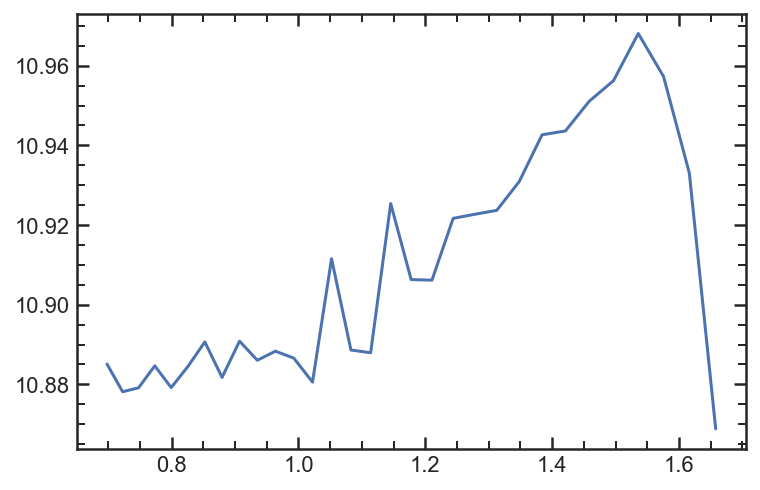

In [19]:
plt.figure()
plt.plot(rshift, np.log10(lmass))


In [11]:
f = h5py.File('/Volumes/Vince_CLEAR/Simba_cats/m100n1024_116.hdf5', 'r')

In [16]:
SFR = f['galaxy_data']['sfr'][:]
SFR[SFR < 0.01] = 0.01

SM = f['galaxy_data']['dicts']['masses.stellar'][:]
lSM = np.log10(SM)

SM30 = f['galaxy_data']['dicts']['masses.stellar_30kpc'][:]

sSFR = np.log10(SFR/SM)
    
progen = np.array(f['tree_data']['progen_galaxy_star'][:]).T[0]

R50 = f['galaxy_data']['dicts']['radii.stellar_half_mass'][:]
R20 = f['galaxy_data']['dicts']['radii.stellar_r20'][:]
R80 = f['galaxy_data']['dicts']['radii.stellar_r80'][:]


Sdb = pd.DataFrame({'sfr':SFR, 'stellar_mass' : SM, 'lmass' : lSM, 'lssfr' : sSFR, 'progen':progen})

<AxesSubplot:xlabel='lmass', ylabel='lssfr'>

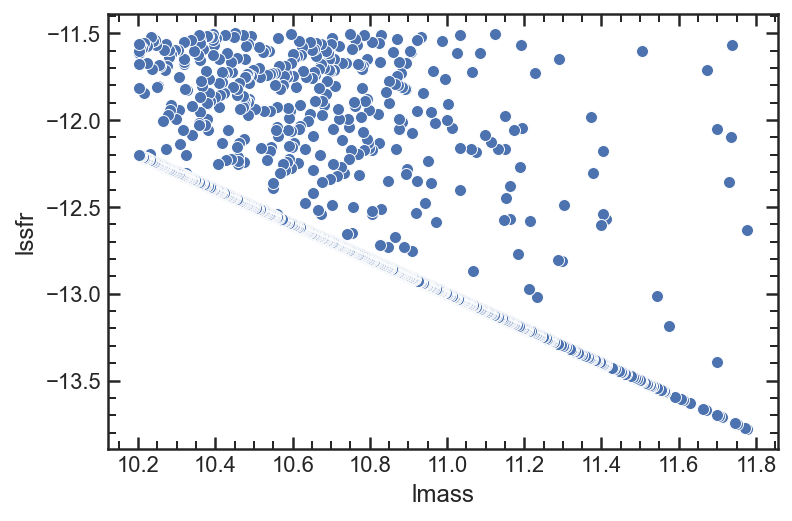

In [17]:
Rdb = Sdb.query('10.2 < lmass < 11.8 and lssfr < -11.5')

sea.scatterplot(Rdb.lmass, Rdb.lssfr)

In [20]:
for g in Rdb.index:
    lm, sfr, r50, r20, r80 = x_params(g)
    np.save('../data/Simba_evo/evo_{}'.format(g), [rshift,lm, sfr, r50, r20, r80])